# Homework Assignment 4

## Using the Perceptron, SVMs, and PCA with Toxicity Data

### <p style="text-align: right;"> &#9989; Jil Mueller.</p>
### <p style="text-align: right;"> &#9989; Jil-mueller</p>


### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` and the branching functionality to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Train a perceptron and compare to SVC model

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **63 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due by 11:59 pm on Friday, December 5. It should be pushed to your repo (see Part 1) AND submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [24]:
# Put all necessary imports here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA
import seaborn as sns

---
## Part 1: Git Repo Management and Branching (6 points)

For this assignment, you're going to add it to the `cmse202-f25-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository.

3. Create a **new branch** called `hw04_branch`.

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

```bash
git clone https://github.com/Jil-mueller/CMSE202-f25-turnin.git
```

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f25-turnin`" repository inside the `hw-04` directory that you just created within the new branch `hw04_branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
<a id="loading"></a>
## Part 2. Loading the dataset: Toxicity data (10 points)

The dataset contains information about molecules along with the an indication if it is toxic or nontoxic.

The goal of this assignment is to use this dataset to practice using the Perceptron classifier, SVMs, and PCA tools we've covered in class. Since the goal of the assignment is to develop models, we have supplied a clean dataset without any missing values. 
 
#### The data

**&#9989; Do This:**  To get started, you'll need to download the associated `data.csv` file:
`https://raw.githubusercontent.com/hoolagans/CMSE202_FS24/refs/heads/main/data.csv`

Once you've downloaded the data, **open the files using a text viewer or other tool on your computer and take a look at the data to get a sense of the information it contains.** If you are curious about this dataset it came from the following link [Toxicity Data](https://archive.ics.uci.edu/dataset/728/toxicity-2).

### 2.1 Load the data

**&#9989; Task 2.1 (3 point):** Read the ```data.csv``` file into your notebook. We're going to use the "Class" column as the classes that we'll be trying to predict with our classification models. You will want to replace the values in "Class" with 1 and 0 by assigning "Toxic" to 1 and "NonToxic" to 0. 

Once you've loaded in the data, **display the head of the DataFrame to make sure it looks reasonable**. 

In [25]:
# Put your code here
data = pd.read_csv("/home/muell333/CMSE202-f25-turnin/hw-04/data.csv")
data["Class"] = data["Class"].replace({"Toxic": 1, "NonToxic": 0})

data.head()

/tmp/ipykernel_1699963/2931747595.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Class"] = data["Class"].replace({"Toxic": 1, "NonToxic": 0})


,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,0
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,0
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,0
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,0
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,0


### 2.2 Plotting the Data

**&#9989; Task 2.2 (2 points):** Use the seaborn pairplot function to view the distributions of the different classes across the different feature pairs. There are too many featuers to display here, so just display the last 5 features in the dataset. You should use the "hue" option to set the points to be colored based on the "Class" so you can easily identify the different class distributions. You should get a 5x5 frame of plots. 

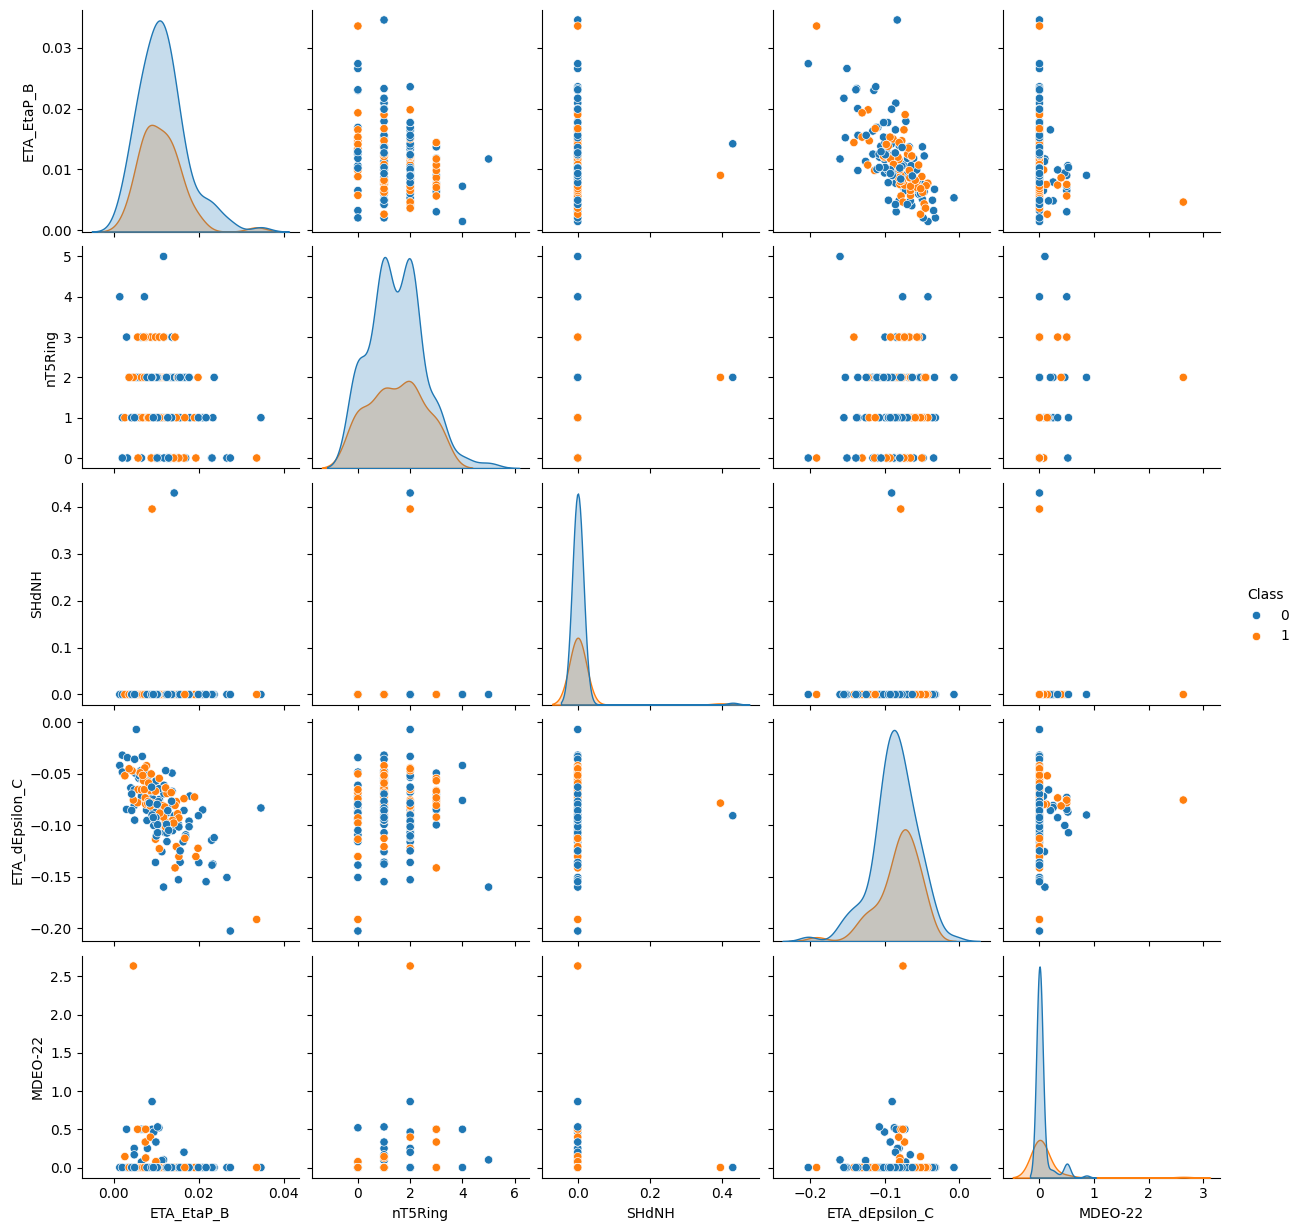

In [26]:
# Put your code here
last5features = data.iloc[:, -6:]
sns.pairplot(last5features, hue = "Class")

&#9989; **Question 2.1 (2 point):** Looking at the plots, does it look like we should be able to reasonably find a classifier to separate the classes? Record your observations. 

<font size=+3>&#9998;</font> *Based on the pairplot, there appears to be enough structure in the data that a classifier should reasonably be able to separate toxic from nontoxic, though some overlap means it won’t be perfect. For example, NT5ring and SHdNH seperate toxic and non toxic into two distcinct groups (so no obvious overlap).*

### 2.3 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.3 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the seed features, and one called `labels`, which contains all of the integer "Class" labels. **Display both of these new DataFrames to make sure they look correct.**

In [27]:
# Put your code here
features = data.drop('Class', axis=1)

labels = data['Class']

features.head()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,28.2185,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,33.1064,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,32.5232,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00
4,0.0135,0,0.0424,-0.0353,0,0.0,-0.0638,0.0307,0.0,0.0306,...,32.0726,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00


In [28]:
labels.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

&#9989; **Question 2.2 (2 points):** What accuracy would you achieve if you produced a model that just predicted "NonToxic" for the entire dataset? Would you consider this model to be useful? Why or why not? (Include the code you used to determine this along with your written answer below.)

In [29]:
# Put your code here
nontoxic_preds = [0] * len(labels)

nontoxic_accuracy = (nontoxic_preds == labels).mean()
print("NonToxic accuracy:", nontoxic_accuracy)

NonToxic accuracy: 0.672514619883041


<font size=+3>&#9998;</font> *It would have a 67.25% accuracy*

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## Part 3. Building an SVC model (7 points)

Now, to tackle this classification problem, we will use a support vector machine. Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a rbf kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (2 point):** Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility , set the `random_state` argument to `12`. Print the lengths to show you have the right number of entries.

In [32]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(
    features,
    labels,
    test_size = 0.20,
    random_state = 12,
    stratify = labels
)

print("Training samples:", train_vectors.shape[0])
print("Testing samples:", test_vectors.shape[0])

Training samples: 136
Testing samples: 35


### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (4 points):** Build a **rbf** kernel SVC model with `C=10`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**First Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [33]:
# Put your code here
start = time.time()

svc_model = SVC(kernel='rbf', C=10, class_weight='balanced', random_state=12)

print("Fitting the classifier to the training set")
svc_model.fit(train_vectors, train_labels)

y_pred = svc_model.predict(test_vectors)

print("Confusion Matrix:")
print(confusion_matrix(test_labels, y_pred))

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

end = time.time()
print("Runtime:", end - start)

Fitting the classifier to the training set
Confusion Matrix:
[[21  3]
 [ 8  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        24
           1       0.50      0.27      0.35        11

    accuracy                           0.69        35
   macro avg       0.61      0.57      0.57        35
weighted avg       0.65      0.69      0.65        35

Runtime: 0.04584860801696777


&#9989; **Question 3.1 (1 point):** How accurate is your model? Looking at the Confusion Matrix, is the model doing anything useful? 

<font size=+3>&#9998;</font> *Precision tells you how often your model was correct when it predicted a certain class. The precision is not very high for toxic or nontoxic, but it is higher for nontoxic (72% accuracy), meaning when the model says “nontoxic,” it’s usually right, but when it says “toxic,” it’s often wrong. Recall tells you of all the times a model predicted a certain class, how often it was correct. For this model, it is relatively high for nontoxic (0.88), but low for toxic (0.27), meaning the model misses most toxic cases.. F1 score combines both the precision metric and recall metric into a single number. The recall score is again high for the nontoxic class but low for the toxic class. The model does well at identifying nontoxic samples but struggles to detect Toxic ones. This makes it not very useful if the goal is to reliably catch Toxic cases. Finally, the accuracy is 69%, which is not very high.*

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## Part 4. Building an SVC model using transformed data (10 points)

As we saw in class, we can synthesize new features that can allow us to take a problem that is challenging to separate linearly and make it easier to classify. In some cases, we may even be able to make data linearly separable. 

This dataset has many features and is very challenging so it would be unreasonable to expect you to come up with new features here, so I've done this step for you. You will just load in this new dataset and begin exploring it in this section. 

### 4.1 Loading in transformed data

**&#9989; Task 4.1 (3 points):** Load in the new dataset titled 'transformed.csv' from 'https://raw.githubusercontent.com/hoolagans/CMSE202_FS24/refs/heads/main/transformed.csv' and then create a seaborn pairplot using the entire dataframe with the points colored based on the class label. (Note: you will also need to replace the labels with 1 and 0 just as you did in the earlier section with the other dataset.) 

In [35]:
# Put your code here
transformed = pd.read_csv("/home/muell333/CMSE202-f25-turnin/hw-04/transformed.csv")

transformed["Class"] = transformed["Class"].replace({"Toxic": 1, "NonToxic": 0})

transformed.head()

/tmp/ipykernel_1699963/3469785648.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  transformed["Class"] = transformed["Class"].replace({"Toxic": 1, "NonToxic": 0})


,ft1,ft2,ft3,ft4,ft5,ft21,ft22,ft23,ft24,ft25,Class
0,0.557632,0.354342,0.552300,0.475267,0.366047,0.348165,0.328315,0.272781,0.281521,0.273278,0
1,0.404432,0.358862,0.410095,0.436882,0.594887,0.435282,0.584719,0.520591,0.575648,0.423089,0
2,-0.305128,-0.295088,-0.350207,-0.394219,-0.360917,0.193658,0.165095,0.341142,0.299079,0.328429,0
3,0.051220,0.139340,0.019937,0.278016,0.123218,0.434357,0.320298,0.403190,0.333130,0.386477,0
4,0.347668,0.202201,0.241536,0.207669,0.268381,0.297848,0.265906,0.423791,0.271230,0.322036,0


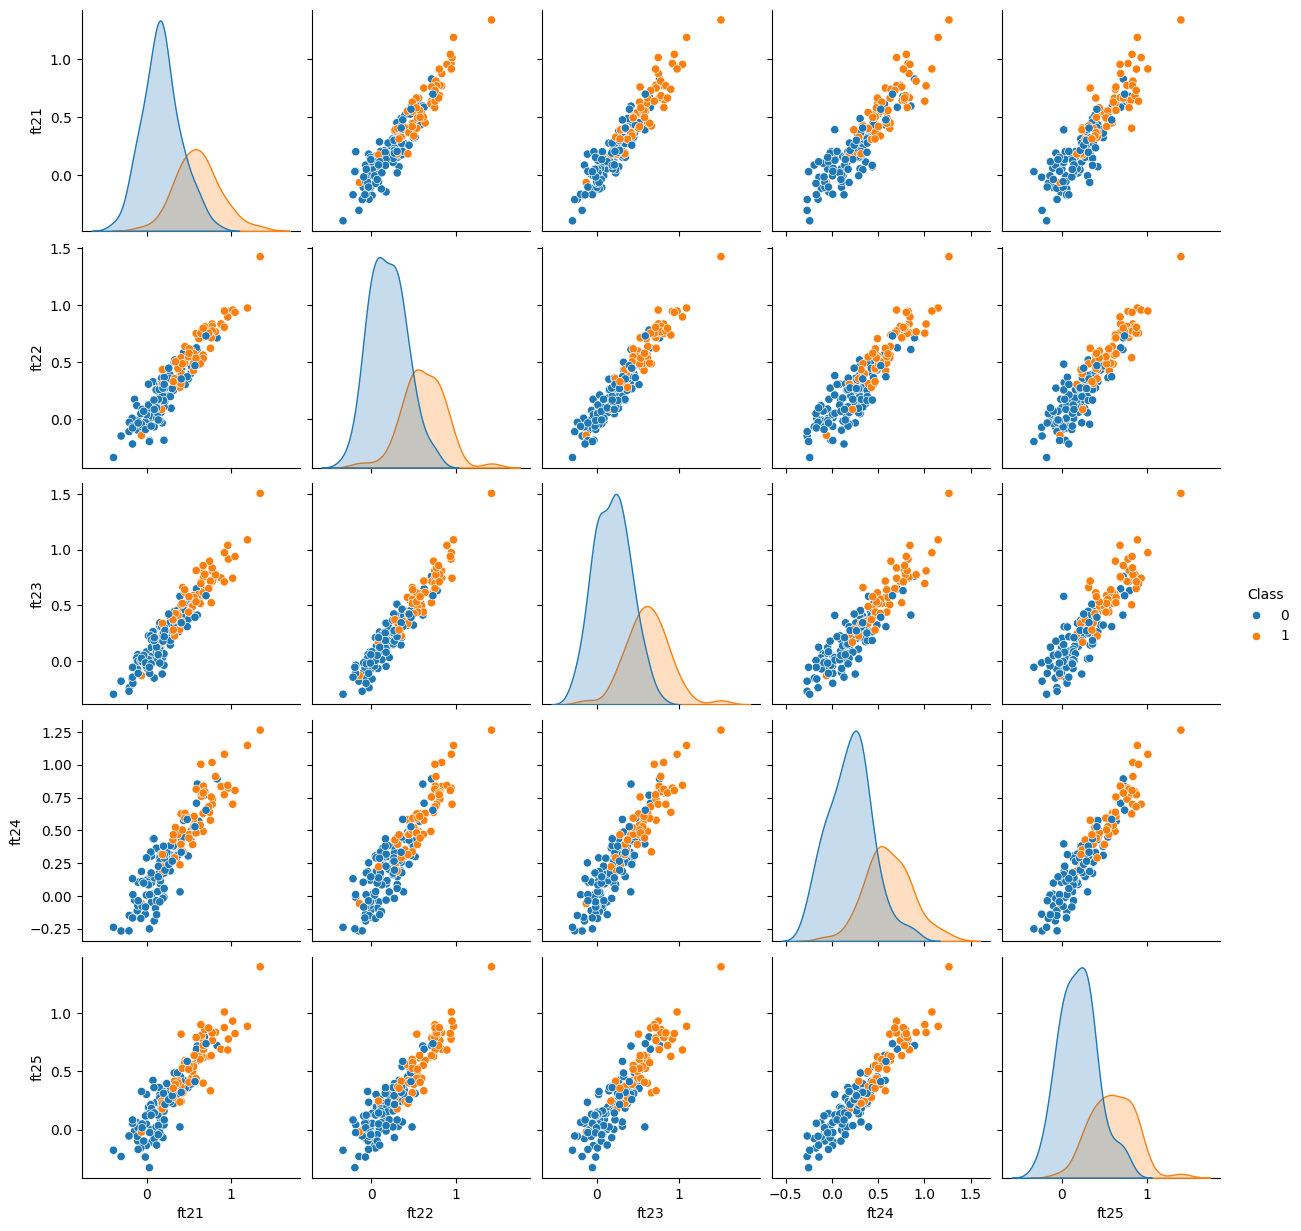

In [36]:
last5 = transformed.iloc[:, -6:]
sns.pairplot(last5, hue = "Class")

**&#9989; Question 4.1 (2 points):** Looking at the pairplots, does it seem that these transformed features will make it easier to classify. 

<font size=+3>&#9998;</font> *These look like they will be much easier to classify, as the two classes are much more distinct. You can clearly see that there are two different groups, even if there is some slight overlap that may get in the way of a perfect classification.*

### 4.2 Modeling the data and evaluating the fit

Now using the new data, create training and testing splits and then fit the data using a SVC model. 

**&#9989; Task 4.2 (4 points):** Build a **linear** kernel SVC model with `C=1.0`, fit it to the training set, and use the test set to evaluate the model. Evaluate the fit using the **confusion matrix** and **classification report**. (Note: use seed 12 again when splitting the data and use train_size=0.8.)


In [37]:
# Put your code here
features_2 = transformed.drop('Class', axis=1)

labels_2 = transformed['Class']

train_vectors_2, test_vectors_2, train_labels_2, test_labels_2 = train_test_split(
    features_2,
    labels_2,
    test_size = 0.20,
    random_state = 12,
    stratify = labels
)



start = time.time()

svc_model_2 = SVC(kernel='rbf', C=1, class_weight='balanced', random_state=12)

print("Fitting the classifier to the training set")
svc_model_2.fit(train_vectors_2, train_labels_2)

y_pred_2 = svc_model_2.predict(test_vectors_2)

print("Confusion Matrix:")
print(confusion_matrix(test_labels_2, y_pred_2))

print("\nClassification Report:")
print(classification_report(test_labels_2, y_pred_2))

end = time.time()
print("Runtime:", end - start)

Fitting the classifier to the training set
Confusion Matrix:
[[19  5]
 [ 2  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        24
           1       0.64      0.82      0.72        11

    accuracy                           0.80        35
   macro avg       0.77      0.80      0.78        35
weighted avg       0.82      0.80      0.81        35

Runtime: 0.021637678146362305


&#9989; **Question 4.2 (1 point):** How accurate is your model? Did it perform better with this new transformed data? 

<font size=+3>&#9998;</font> *The accuray score is 80%, which is 11% higher than that of the previous model. Additionally, the precision, recall, and f1 scores all went up from the last model.*

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## Part 5. Finding and using the best hyperparameters (9 points)

At this point, we have fit an SVC model on two datasets and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. 

In this section, continue using the transformed data. 


### 5.1 Performing a grid search

**&#9989; Task 5.1 (4 points):** Using the following parameters `C` = `0.1`, `1.0`, `10.0`, `100.0`, `1000.0` and `gamma` = `0.01`, `0.1`, `1.0`, `10.0` for a `linear`, `rbf`, and `sigmoid` kernels use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best params" that the grid search found (*hint*: there's an attribute associated with the GridSearchCV object that stores this information). Note that this code could take a while to run since it is repeatedly training your SVM. 

In [10]:
# Put your code here


&#9989; **Question 5.1 (1 point):** How do the "best params" results of the grid search compare to what you used in Part 4? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> Erase this and put your answer here.

### 5.2 Evaluating the best fit model

Now that we have found the "best params", let's determine how good the fit is.

**&#9989; Task 5.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [11]:
# Put your code here


&#9989; **Question 5.2.1 (1 point):** How accurate is this "best" model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font> Erase this and put your answer here.

&#9989; **Question 5.2.2 (1 point):** How does the model compare to the state-of-the-art performance achieved in the article at this link [Paper](https://www.nature.com/articles/s41598-021-97962-5)? Look at Table 2 and Table 3 in the paper. 

<font size=+3>&#9998;</font> Erase this and put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## Part 6. Using Principal Components (11 points)

The full model uses all 10 transformed features to predict the results and you likely found that the model is decently accurate using all 10 features, but not perfect. **Could we get the same level of accuracy (or better) using fewer features?** When datasets start to get very large and complex, applying some sort of **feature reduction** method can reduce the computational resources needed to train the model and, in some case actually improve the accuracy.

When performing feature reduction, one could simply try to identify which features seem most important and drop the ones that aren't, but performing a Principal Component Analysis (PCA) to determine the features that contribute the most to the model (through their accounted variance) can be more effective.

### 6.1 Running a Principle Component Analysis (PCA)

Since we have 10 total features to start with, let's see how well we can do with just 1 feature. Reduce the feature count to **1** principle components. 

**&#9989; Task 6.1 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using 1 component. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [12]:
# Put your code here


&#9989; **Question 6.1 (1 point):** What is the total explained variance ratio captured by this simple 1-component PCA? How well do you think a model with just 1 feature will perform? Why?

<font size=+3>&#9998;</font> Erase this and put your answer here.

### 6.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 6.2 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix. (Note: use the same parameter options as we used in the previous hyperparameter search.)

In [13]:
# Put your code here


&#9989; **Question 6.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How does it compare to the full feature model?

<font size=+3>&#9998;</font> Erase this and put your answer here.

### 6.3 Repeat your analysis with more components

What if we increase the number of principle components to **4**? What happens now?

**&#9989; Task 6.3 (2 points):** Repeat your analysis from 6.1 and 6.2 using **4 components** instead. As part of your analysis, **print the total explained variance ratio as well as the sum of these values**.

In [14]:
# Put your code here


&#9989; **Question 6.3 (2 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? 

<font size=+3>&#9998;</font> Erase this and put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Revisiting the Perceptron classifier (10 points)

In class you implemented your own perceptron class. Fortunately, there is a perceptron classifier already built into scikit learn, so in this portion of the assignment we will be exploring scikit learn's perceptron


&#9989; **Do this**: 
Run the following cell to import the code from the Perceptron class.

In [15]:
from sklearn.linear_model import Perceptron

**&#9989; Task 7.1 (4 points):** Create an instance of the `Perceptron` object using **alpha=0.001** and **penalty='l2'**. Then, use the `fit()` to train the classifier using the training features and labels dataset you've been using in the assignment up to this point. Finally, use the `predict()` method to predict the labels for the test features and print the accuracy score.

In [16]:
# Put your code here


**&#9989; Question 7.1 (1 points):** How good of job did the Perceptron classifier do classifying this datset? How does it compare to the SVC model you built in the previous parts of this assignment?

<font size=+3>&#9998;</font> Erase this and put your answer here.

**&#9989; Task 7.2 (4 points):** Now perform a grid search as you did with the support vector classifier earlier in this assignment. Here you will want to search over `penalty` = `l2`, `l1`, `elasticnet` and `alpha`= `0.0001`, `0.001`, `0.01`, and `0.1`. Find and return the best parameters, the confusion matrix, and the classification report. 

In [17]:
# Put your code here


**&#9989; Question 7.2 (1 point):** How do these results compare to the results when using a support vector classifier now that we optimized the parameters? Did the perceptron do better or worse? 

<font size=+3>&#9998;</font> Erase this and put your answer here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository `hw04_branch` using the commit message "Committing Part 7", and push the changes to GitHub.

---

---
## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw04_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework 4, and upload your notebook.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University